Name - Harsh Kasundra

Roll No. - U23AI125

DS Lab - 1 

# Frequency Analysis and Probability in Data Science
## Objective

This lab provides hands-on experience with:

- Creating and analyzing frequency tables  
- Calculating joint, marginal, and conditional probabilities  
- Understanding and computing correlation between variables  
- Visualizing relationships in data using bar plots and heatmaps  

**Dataset**: Titanic Dataset  
URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Task 1: Frequency Table of Categorical Variable

In [6]:

abs_freq = df['class'].value_counts().sort_index()

rel_freq = df['class'].value_counts(normalize=True).sort_index() * 100

cum_freq = abs_freq.cumsum()

freq_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq.round(2),
    'Cumulative Frequency': cum_freq
})
print(freq_table)

        Absolute Frequency  Relative Frequency (%)  Cumulative Frequency
class                                                                   
First                  216                   24.24                   216
Second                 184                   20.65                   400
Third                  491                   55.11                   891


Task 2: Two-Way Table of sex vs survived

In [7]:
contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True)
contingency_table.columns = ['Not Survived', 'Survived', 'Total']
contingency_table.index = ['Female', 'Male', 'Total']
print(contingency_table)

        Not Survived  Survived  Total
Female            81       233    314
Male             468       109    577
Total            549       342    891


Task 3: Compute the Probabilities

In [8]:
total_passengers = len(df)

Joint Probability

Formula:
P(A ∩ B) = Count(A and B) / Total

In [9]:
joint_prob = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / total_passengers
print(f"P(Female ∩ Survived) = {joint_prob:.4f}")

P(Female ∩ Survived) = 0.2615


Marginal Probability

P(A) = Total A / Total passengers

In [10]:
p_female = len(df[df['sex'] == 'female']) / total_passengers
p_survived = len(df[df['survived'] == 1]) / total_passengers

print(f"P(Female) = {p_female:.4f}")
print(f"P(Survived) = {p_survived:.4f}")

P(Female) = 0.3524
P(Survived) = 0.3838


Conditional Probability

Formula:
P(B | A) = P(A ∩ B) / P(A)

In [11]:
p_survived_given_female = joint_prob / p_female

p_female_given_survived = joint_prob / p_survived

print(f"P(Survived | Female) = {p_survived_given_female:.4f}")
print(f"P(Female | Survived) = {p_female_given_survived:.4f}")

P(Survived | Female) = 0.7420
P(Female | Survived) = 0.6813


Task 4: Numerical Correlation (age and fare)

In [12]:
numeric_df = df[['age', 'fare']].dropna()

correlation = numeric_df['age'].corr(numeric_df['fare'])
print(f"Pearson correlation between age and fare: {correlation:.4f}")

Pearson correlation between age and fare: 0.0961


Visualization

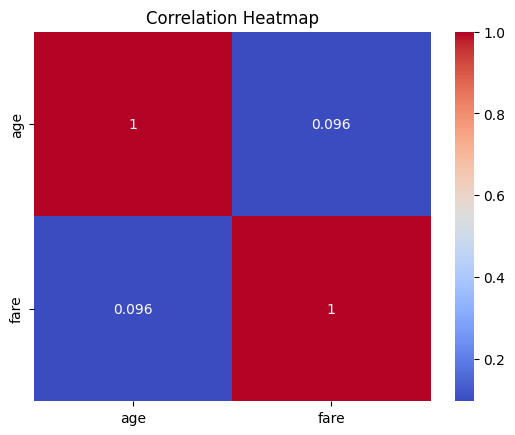

In [20]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

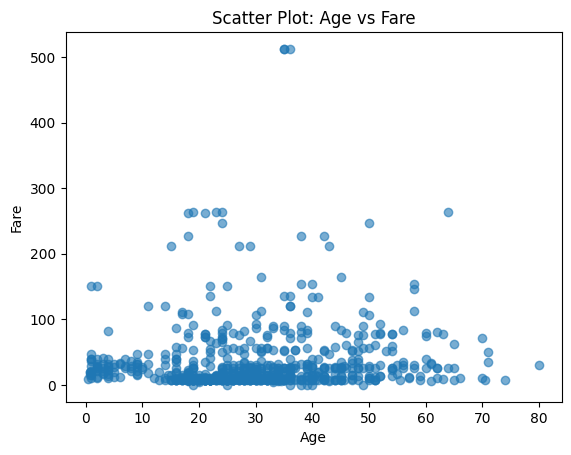

In [14]:
plt.scatter(numeric_df['age'], numeric_df['fare'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot: Age vs Fare")
plt.show()

Task 5: Interpretation

Frequency Table:
Most passengers were in Third Class. First Class had the fewest.

Probabilities:
- Female passengers had a much higher survival rate than males.
- The probability of survival given that a passenger is female was over 70%.

Correlation:
- The correlation between age and fare was low, suggesting no strong linear relationship.

Survival by Class:
- First Class passengers had the highest survival rate.
- Third Class had the lowest — possibly due to their location in the ship or access to lifeboats.


Bonus Task:
Use the class and survived variables:

-Create a stacked bar chart to visualize survival by class.

-Comment on which class had the highest survival rate.


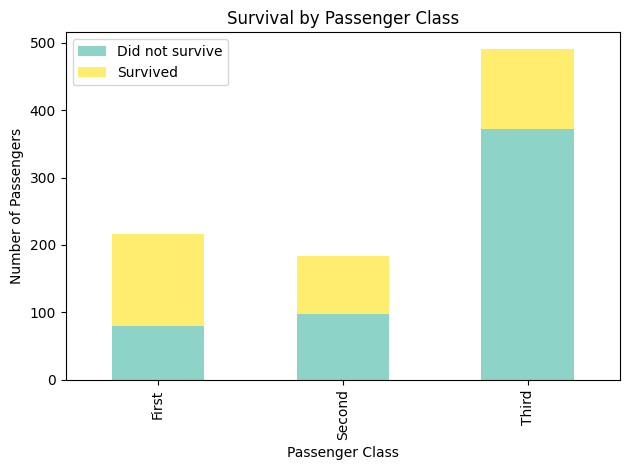

In [15]:
survival_by_class = pd.crosstab(df['class'], df['survived'])

survival_by_class.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(["Did not survive", "Survived"])
plt.tight_layout()
plt.show()